In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sent=("휴일 인 오늘 도 서쪽을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.","폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하 고 있습니다.")

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(sent)
TDM = tfidf_vectorizer.transform(sent).toarray()

In [3]:
TDM

array([[0.        , 0.32412345, 0.        , 0.        , 0.32412345,
        0.32412345, 0.32412345, 0.32412345, 0.32412345, 0.32412345,
        0.        , 0.2306165 , 0.32412345, 0.2306165 , 0.        ,
        0.2306165 ],
       [0.39166832, 0.        , 0.39166832, 0.39166832, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.39166832, 0.27867523, 0.        , 0.27867523, 0.39166832,
        0.27867523]])

In [5]:
print(dict(zip(tfidf_vectorizer.get_feature_names(),TDM.flatten())))

{'갑작스런': 0.0, '내일': 0.32412344955584815, '놀러왔다가': 0.0, '망연자실': 0.0, '반가운': 0.32412344955584815, '서쪽을': 0.32412344955584815, '소식': 0.32412344955584815, '오늘': 0.32412344955584815, '으로': 0.32412344955584815, '이어졌는데요': 0.32412344955584815, '인해': 0.0, '있습니다': 0.23061650387901603, '중심': 0.32412344955584815, '폭염': 0.23061650387901603, '피해서': 0.0, '휴일': 0.23061650387901603}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import numpy as np

In [14]:
jaccard_score(np.array([1,1,0,0]), np.array([1,1,0,2]), average=None)[0]

0.5

In [16]:
cosine_similarity(TDM[0:1],TDM[1:2])

array([[0.19280132]])

In [21]:
euclidean_distances(TDM[0:1],TDM[1:2])

array([[1.27058937]])

In [20]:
manhattan_distances(TDM[0:1],TDM[1:2])

array([[4.69550536]])

In [22]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [24]:
data_set = tf.keras.utils.get_file(fname = 'imdb.tar.gz',origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract = True)

84125825/84125825 [==============================] - 5s 0us/step


In [46]:
os.listdir('/root/.keras/datasets/aclImdb/test/pos')
def directory_data(directory):
  data = {}
  data['review'] = []
  for file_path in os.listdir(directory):
    with open(directory+'/'+file_path,'r',encoding = 'utf-8') as file:
      data['review'].append(file.read())
  return pd.DataFrame.from_dict(data)  

def data(directory):
  pos_df = directory_data('/root/.keras/datasets/aclImdb/test/pos')
  neg_df = directory_data('/root/.keras/datasets/aclImdb/test/neg')

  pos_df['sentiment'] = 1
  neg_df ['sentiment'] = 0

  return pd.concat([pos_df,neg_df],axis=0)

In [47]:
train_df = data('/root/.keras/datasets/aclImdb/test/train')
test_df = data('/root/.keras/datasets/aclImdb/test/test')

In [48]:
train_df.head()

review  sentiment
0  There are a few things in life that we can't e...          1
1  I had the pleasure to view this film when I wa...          1
2  The movie is excellent. Acting, cinematography...          1
3  During the final throes of the Vitnam war, our...          1
4  'Thursday' is a good movie but we recognize to...          1

In [49]:
test_df.head()

review  sentiment
0  There are a few things in life that we can't e...          1
1  I had the pleasure to view this film when I wa...          1
2  The movie is excellent. Acting, cinematography...          1
3  During the final throes of the Vitnam war, our...          1
4  'Thursday' is a good movie but we recognize to...          1

In [50]:
review = train_df['review']
type(review)

pandas.core.series.Series

In [51]:
tokenized_reviews = [r.split() for r in review]
tokenized_reviews

[['There',
  'are',
  'a',
  'few',
  'things',
  'in',
  'life',
  'that',
  'we',
  "can't",
  'experience',
  'more',
  'than',
  'once',
  'and',
  'the',
  'college',
  'experience',
  'is',
  'one',
  'of',
  'them.',
  'Especially',
  'if',
  "we're",
  'living',
  'in',
  'a',
  'foreign',
  'country',
  'and',
  'in',
  'a',
  'apartment',
  'with',
  '6',
  'wackos',
  'from',
  '6',
  'different',
  'countries.',
  'Xavier',
  'the',
  'main',
  'character',
  'leaves',
  'his',
  'tidy',
  'life',
  'in',
  'Paris,',
  'his',
  'ex-hippy',
  'mother',
  'and',
  'his',
  'beautiful',
  'girlfriend',
  'and',
  'goes',
  'to',
  'Barcelona',
  'to',
  'study',
  'spanish',
  'in',
  'order',
  'to',
  'get',
  'a',
  'job',
  'at',
  'the',
  'embassy.',
  'He',
  'falls',
  'in',
  'love',
  'with',
  'the',
  'wife',
  'of',
  'a',
  'french',
  'doctor',
  'and',
  'he',
  'makes',
  'friends',
  'that',
  'make',
  'him',
  'look',
  'at',
  'things',
  'differently.',
 

In [52]:
tokenized_reviews[0]

['There',
 'are',
 'a',
 'few',
 'things',
 'in',
 'life',
 'that',
 'we',
 "can't",
 'experience',
 'more',
 'than',
 'once',
 'and',
 'the',
 'college',
 'experience',
 'is',
 'one',
 'of',
 'them.',
 'Especially',
 'if',
 "we're",
 'living',
 'in',
 'a',
 'foreign',
 'country',
 'and',
 'in',
 'a',
 'apartment',
 'with',
 '6',
 'wackos',
 'from',
 '6',
 'different',
 'countries.',
 'Xavier',
 'the',
 'main',
 'character',
 'leaves',
 'his',
 'tidy',
 'life',
 'in',
 'Paris,',
 'his',
 'ex-hippy',
 'mother',
 'and',
 'his',
 'beautiful',
 'girlfriend',
 'and',
 'goes',
 'to',
 'Barcelona',
 'to',
 'study',
 'spanish',
 'in',
 'order',
 'to',
 'get',
 'a',
 'job',
 'at',
 'the',
 'embassy.',
 'He',
 'falls',
 'in',
 'love',
 'with',
 'the',
 'wife',
 'of',
 'a',
 'french',
 'doctor',
 'and',
 'he',
 'makes',
 'friends',
 'that',
 'make',
 'him',
 'look',
 'at',
 'things',
 'differently.',
 'When',
 "Wendy's",
 'brother',
 '(Wendy',
 'is',
 'one',
 'of',
 'the',
 'room',
 'mates)',
 'c

In [53]:
review_len_by_token = [len(t) for t in tokenized_reviews]

In [55]:
review_len_by_eumjeol = [len(s.replace(" ","")) for s in review]

In [56]:
import matplotlib.pyplot as plt

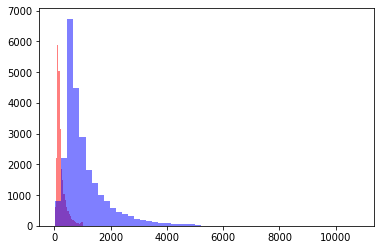

In [57]:
plt.hist(review_len_by_token, bins = 50, alpha=0.5, color='r',label='word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha=0.5, color='b',label='alpahbet')

plt.show()